In [1]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{mathtools}")
plt.rc("font", size=10, family="serif", serif="cm")
plt.rc("figure", figsize=(1.8, 1.5))

In [3]:
def uniform_cf(t, a, b):
    out = torch.exp(1j * b * t) - torch.exp(1j - a * t)
    out /= 1j * t * (b - a)
    return out

In [4]:
a, b = 3, 5

nb_epochs = 5000
batch_size = 10

n_test = 1000
nb_params = 100

t = torch.linspace(1, 100, 100).view(-1, 1, 1, 1)
# t = torch.linspace(.1, 1, 10).view(-1, 1, 1, 1)
x = torch.linspace(0, 1, n_test).view(1, -1, 1, 1)

In [5]:
# Compute outputs for different parameters
std = torch.linspace((b - a) - 3, (b - a) + 3, nb_params).view(-1, 1)
bia = torch.linspace(a - 3, a + 2, 2*nb_params).view(1, -1)
y = std * x + bia

z = torch.exp(1j * y * t)
z -= uniform_cf(t, a, b)
z = z.mean(dim=1)
loss = torch.mean(z.real**2, dim=0) + torch.mean(z.imag**2, dim=0)

Z = np.clip(loss.numpy(), 0, 1e-1)
X, Y = np.meshgrid(bia.numpy().squeeze(), std.numpy().squeeze())

fig, ax = plt.subplots()
c = plt.contourf(X, Y, Z)
ax.set_xlabel("Bias")
ax.set_ylabel("Std")
fig.colorbar(c)
fig.savefig("uni_mgf_med.pdf", bbox_inches="tight")

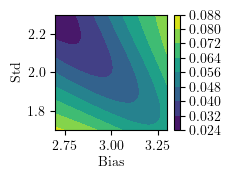

In [ ]:
# Compute outputs for different parameters
std = torch.linspace((b - a) - .3, (b - a) + .3, nb_params).view(-1, 1)
bia = torch.linspace(a - .3, a + .3, 2*nb_params).view(1, -1)
y = std * x + bia

z = torch.exp(1j * y * t)
z -= uniform_cf(t, a, b)
z = z.mean(dim=1)
loss = torch.mean(z.real**2, dim=0) + torch.mean(z.imag**2, dim=0)

Z = np.clip(loss.numpy(), 0, 1e-1)
X, Y = np.meshgrid(bia.numpy().squeeze(), std.numpy().squeeze())

fig, ax = plt.subplots()
c = plt.contourf(X, Y, Z)
ax.set_xlabel("Bias")
ax.set_ylabel("Std")
fig.colorbar(c)
fig.savefig("uni_mgf_fine.pdf", bbox_inches="tight")

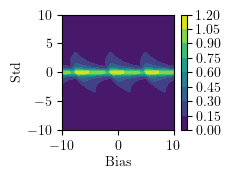

In [ ]:
# Compute outputs for different parameters
std = torch.linspace(-10, 10, nb_params).view(-1, 1)
bia = torch.linspace(-10, 10, 2*nb_params).view(1, -1)
y = std * x + bia

z = torch.exp(1j * y * t)
z -= uniform_cf(t, a, b)
z = z.mean(dim=1)
loss = torch.mean(z.real**2, dim=0) + torch.mean(z.imag**2, dim=0)

Z = np.clip(loss.numpy(), 0, 1)
X, Y = np.meshgrid(bia.numpy().squeeze(), std.numpy().squeeze())

fig, ax = plt.subplots()
c = plt.contourf(X, Y, Z)
ax.set_xlabel("Bias")
ax.set_ylabel("Std")
fig.colorbar(c)
fig.savefig("uni_mgf_coarse.pdf", bbox_inches="tight")